<a href="https://colab.research.google.com/github/Roshen10/Pavement_Management/blob/Crack-Initiation/mlFeatureImportance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Generate a sample dataframe to simulate your structure
sample_data = {
    "Chainage": [f"C{i:03d}" for i in range(100)],
    "Distress_Type": np.random.choice(["Cracking", "Pothole", "Ravelling", "Edge Break", "Disintegration"], 100),
    "Pavement_Type": np.random.choice(["Asphalt", "Concrete"], 100),
    "Roughness_Index_IRI": np.random.uniform(1.5, 8.0, 100),
    "Crack_Area": np.random.uniform(0.5, 20.0, 100),
    "Crack_Depth": np.random.uniform(0.1, 5.0, 100),
    "Rutting_Depth": np.random.uniform(2.0, 15.0, 100),
    "Traffic_Lane_Usage": np.random.choice(["Left", "Right", "Balanced"], 100),
    "Lane_Traffic_Count": np.random.randint(1000, 5000, 100),
    "Last_Repair_Date": [datetime.today().strftime('%Y-%m-%d')] * 100,
    "Reoccurrence_Time_Days": np.random.randint(30, 365, 100),
    "Repair_Status": np.random.choice([0, 1], 100),
    "Time_Since_Repair_Days": np.random.randint(0, 400, 100),
}
def classify_condition(row):
    if row["Pavement_Type"] == "Bituminous Concrete":
        if row["Roughness_Index_IRI"] < 2.81:
            return "Good"
        elif row["Roughness_Index_IRI"] <= 3.55:
            return "Fair"
        else:
            return "Poor"
    elif row["Pavement_Type"] == "Cement Concrete":
        if row["Roughness_Index_IRI"] < 3.05:
            return "Good"
        elif row["Roughness_Index_IRI"] <= 3.55:
            return "Fair"
        else:
            return "Poor"
    else:
        return "Unknown"

df["Surface_Condition"] = df.apply(classify_condition, axis=1)
df = pd.DataFrame(sample_data)
threshold_area = 0.1
# Create Is_Hotspot target
df["Is_Hotspot"] = df["Is_Hotspot"] = (
    (df["Reoccurrence_Time_Days"] < 120) &
    (df["Crack_Area"] > threshold_area) |
    (df["Repair_Status"] == 1) & (df["Time_Since_Repair_Days"] < 90)
).astype(int)

# Encode categorical columns
categorical_cols = ["Distress_Type", "Pavement_Type", "Traffic_Lane_Usage"]
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

# Define features and target
feature_cols = ["Distress_Type", "Pavement_Type", "Roughness_Index_IRI",
                "Crack_Area", "Crack_Depth", "Rutting_Depth",
                "Traffic_Lane_Usage", "Lane_Traffic_Count",
                "Repair_Status", "Time_Since_Repair_Days"]
target_col = "Is_Hotspot"

X = df[feature_cols]
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest with class_weight balanced
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


# Predict and evaluate
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

pd.DataFrame(report).transpose()


,precision,recall,f1-score,support
0,0.777778,0.933333,0.848485,15.00
1,0.500000,0.200000,0.285714,5.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.638889,0.566667,0.567100,20.00
weighted avg,0.708333,0.750000,0.707792,20.00


In [38]:


# Step 2: Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Step 3: Simulate your dataset
np.random.seed(40)
sample_data = {
    "Distress_Type": np.random.choice(["Cracking", "Pothole", "Ravelling", "Edge Break", "Disintegration"], 100),
    "Pavement_Type": np.random.choice(["Asphalt", "Concrete"], 100),
    "Roughness_Index_IRI": np.random.uniform(1.5, 5.0, 100),
    "Crack_Area": np.random.uniform(0.5, 20.0, 100),
    "Crack_Depth": np.random.uniform(0.1, 5.0, 100),
    "Rutting_Depth": np.random.uniform(2.0, 15.0, 100),
    "Traffic_Lane_Usage": np.random.choice(["Left", "Right", "Balanced"], 100),
    "Lane_Traffic_Count": np.random.randint(1000, 5000, 100),
    "Reoccurrence_Time_Days": np.random.randint(30, 365, 100),
    "Repair_Status": np.random.choice([0, 1], 100),
    "Time_Since_Repair_Days": np.random.randint(0, 400, 100),
}
df = pd.DataFrame(sample_data)
df["Is_Hotspot"] = (df["Reoccurrence_Time_Days"] < 180).astype(int)

# Step 4: Encode categorical variables
categorical_cols = ["Distress_Type", "Pavement_Type", "Traffic_Lane_Usage"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 5: Split and apply SMOTE
features = ["Distress_Type", "Pavement_Type", "Roughness_Index_IRI", "Crack_Area",
            "Crack_Depth", "Rutting_Depth", "Traffic_Lane_Usage", "Lane_Traffic_Count",
            "Repair_Status", "Time_Since_Repair_Days"]

X = df[features]
y = df["Is_Hotspot"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.67      0.62      0.64        13

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20



In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd
from google.colab import files


uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df['Is_Hotspot'] = (df['Reoccurrence_Time_Days'] < 180).astype(int)

categorical_cols = ['Roughness_Index_IRI',
                    'Rutting_Depth', 'Traffic_Lane_Usage']
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])


features = [ 'Roughness_Index_IRI',
            'Rutting_Depth', 'Traffic_Lane_Usage', 'Lane_Traffic_Count',
            'Repair_Status', 'Time_Since_Repair_Days']
target = 'Is_Hotspot'
#0 = Not a hotspot, 1 is a hotspot
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

pd.DataFrame(report).transpose()


Saving Sample_Road_Deterioration_Data.csv to Sample_Road_Deterioration_Data (8).csv


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:29:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,precision,recall,f1-score,support
0,0.764706,0.866667,0.812500,15.0
1,0.333333,0.200000,0.250000,5.0
accuracy,0.700000,0.700000,0.700000,0.7
macro avg,0.549020,0.533333,0.531250,20.0
weighted avg,0.656863,0.700000,0.671875,20.0


Saving Sample_Road_Deterioration_Data.csv to Sample_Road_Deterioration_Data (18).csv
Original Class Distribution:
 Is_Hotspot
0    72
1    28
Name: count, dtype: int64

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.00      0.00      0.00         5

    accuracy                           0.50        20
   macro avg       0.33      0.33      0.33        20
weighted avg       0.50      0.50      0.50        20



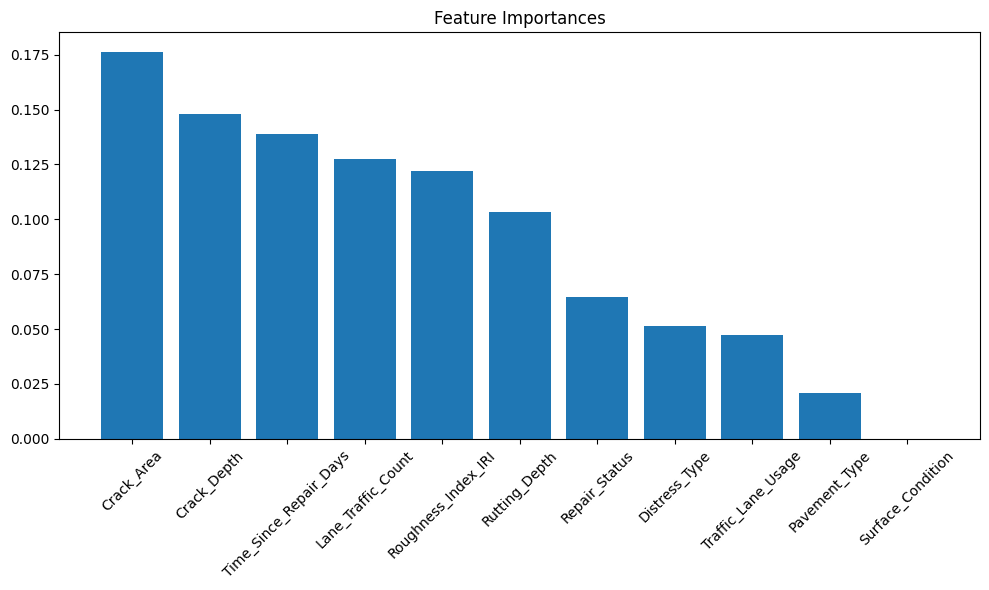

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Cleaning Data
df["Last_Repair_Date"] = pd.to_datetime(df["Last_Repair_Date"], errors='coerce')
df.dropna(inplace=True)

df["Roughness_Index_IRI"] = df["Roughness_Index_IRI"].clip(1, 6.0)
df["Crack_Area"] = df["Crack_Area"].clip(0.1, 0.9)
df["Crack_Depth"] = df["Crack_Depth"].clip(0.1, 0.9)
df["Rutting_Depth"] = df["Rutting_Depth"].clip(2.0, 8.0)
df["Time_Since_Repair_Days"] = df["Time_Since_Repair_Days"].clip(lower=0)
df["Reoccurrence_Time_Days"] = df["Reoccurrence_Time_Days"].clip(lower=0)

df["Pavement_Type"] = df["Pavement_Type"].replace({
    "Concrete": "Cement Concrete",
    "Asphalt": "Bituminous Concrete"
})
df["Distress_Type"] = df["Distress_Type"].str.title().str.strip()
df["Traffic_Lane_Usage"] = df["Traffic_Lane_Usage"].str.capitalize().str.strip()

def classify_condition(row):
    if row["Pavement_Type"] == "Bituminous Concrete":
        if row["Roughness_Index_IRI"] < 2.81:
            return "Good"
        elif row["Roughness_Index_IRI"] <= 3.55:
            return "Fair"
        else:
            return "Poor"
    elif row["Pavement_Type"] == "Cement Concrete":
        if row["Roughness_Index_IRI"] < 3.05:
            return "Good"
        elif row["Roughness_Index_IRI"] <= 3.55:
            return "Fair"
        else:
            return "Poor"
    else:
        return "Unknown"

df["Surface_Condition"] = df.apply(classify_condition, axis=1)

# Step 6: Define composite hotspot logic
threshold_area = 0.1
df["Is_Hotspot"] = (
    (df["Reoccurrence_Time_Days"] < 120) &
    (df["Crack_Area"] > threshold_area)
).astype(int)

# Step 7: Encode categorical features
categorical_cols = ["Distress_Type", "Pavement_Type", "Traffic_Lane_Usage", "Surface_Condition"]
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

feature_cols = ["Distress_Type", "Pavement_Type", "Roughness_Index_IRI", "Crack_Area",
                "Crack_Depth", "Rutting_Depth", "Traffic_Lane_Usage", "Lane_Traffic_Count",
                "Repair_Status", "Time_Since_Repair_Days", "Surface_Condition"]
target_col = "Is_Hotspot"

X = df[feature_cols]
y = df[target_col]

print("Original Class Distribution:\n", y.value_counts())

# Step 9: Train-test split and apply SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 10: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Step 11: Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Step 12: Feature importance visualization
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = [feature_cols[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features_sorted, rotation=45)
plt.tight_layout()
plt.show()


In [54]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
def hdm_crack_progression(row, a0=0.00005, a1=0.03):
    TCI = row["Time_Since_Repair_Days"]
    NEci = row["Lane_Traffic_Count"] * TCI / 365  # approx annualized traffic load
    t50 = (50 * a1 - 0.5 * a1) / (a0 * a1)

    z = 1 if NEci < t50 else -1
    CRX = 50 * (1 - z) + z * (z * a0 * NEci + z * a1 * TCI + (1 - z) * 50)
    return max(0, CRX)  # Ensure non-negative

# Apply the HDM-4 crack model
df["Predicted_Crack_Area_HDM"] = df.apply(lambda row: hdm_crack_progression(row), axis=1)

# Compare actual vs predicted
comparison_df = df[["Crack_Area", "Predicted_Crack_Area_HDM", "Time_Since_Repair_Days", "Lane_Traffic_Count"]]
comparison_df.head()


Saving Sample_Road_Deterioration_Data.csv to Sample_Road_Deterioration_Data (19).csv


,Crack_Area,Predicted_Crack_Area_HDM,Time_Since_Repair_Days,Lane_Traffic_Count
0,0.276014,0.734088,24,4285
1,0.959035,6.051096,200,1865
2,0.282861,9.859476,325,2459
3,0.493585,2.692982,89,1885
4,0.720648,1.243238,41,2357


In [53]:
def hdm_crack_progression(row, a0=0.00005, a1=0.03):
    TCI = row["Time_Since_Repair_Days"]
    NEci = row["Lane_Traffic_Count"] * TCI / 365  # approx annualized traffic load
    t50 = (50 * a1 - 0.5 * a1) / (a0 * a1)

    z = 1 if NEci < t50 else -1
    CRX = 50 * (1 - z) + z * (z * a0 * NEci + z * a1 * TCI + (1 - z) * 50)
    return max(0, CRX)  # Ensure non-negative

# Apply the HDM-4 crack model
df["Predicted_Crack_Area_HDM"] = df.apply(lambda row: hdm_crack_progression(row), axis=1)

# Compare actual vs predicted
comparison_df = df[["Crack_Area", "Predicted_Crack_Area_HDM", "Time_Since_Repair_Days", "Lane_Traffic_Count"]]
comparison_df.head()


,Crack_Area,Predicted_Crack_Area_HDM,Time_Since_Repair_Days,Lane_Traffic_Count
0,0.276014,0.734088,24,4285
1,0.900000,6.051096,200,1865
2,0.282861,9.859476,325,2459
3,0.493585,2.692982,89,1885
4,0.720648,1.243238,41,2357


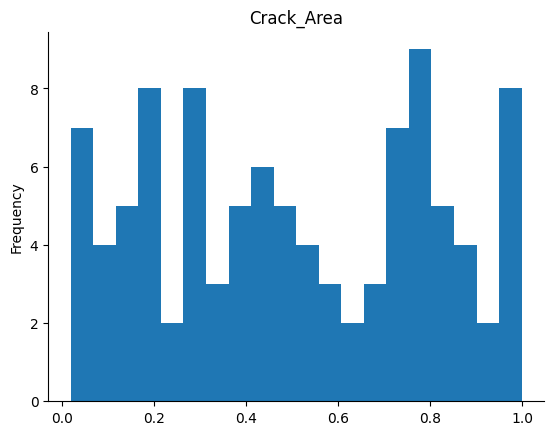

In [55]:
# @title Crack_Area

from matplotlib import pyplot as plt
comparison_df['Crack_Area'].plot(kind='hist', bins=20, title='Crack_Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from google.colab import files

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

df["Last_Repair_Date"] = pd.to_datetime(df["Last_Repair_Date"], errors='coerce')
df.dropna(inplace=True)

df["Roughness_Index_IRI"] = df["Roughness_Index_IRI"].clip(1, 6.0)
df["Crack_Area"] = df["Crack_Area"].clip(0.1, 0.9)
df["Crack_Depth"] = df["Crack_Depth"].clip(0.1, 0.9)
df["Rutting_Depth"] = df["Rutting_Depth"].clip(2.0, 8.0)
df["Time_Since_Repair_Days"] = df["Time_Since_Repair_Days"].clip(lower=0)
df["Reoccurrence_Time_Days"] = df["Reoccurrence_Time_Days"].clip(lower=0)

df["Pavement_Type"] = df["Pavement_Type"].replace({
    "Concrete": "Cement Concrete",
    "Asphalt": "Bituminous Concrete"
})
df["Distress_Type"] = df["Distress_Type"].str.title().str.strip()
df["Traffic_Lane_Usage"] = df["Traffic_Lane_Usage"].str.capitalize().str.strip()

df = df[df["Time_Since_Repair_Days"] <= 365]
df = df[df["Reoccurrence_Time_Days"] <= 365]

def classify_condition(row):
    if row["Pavement_Type"] == "Bituminous Concrete":
        if row["Roughness_Index_IRI"] < 2.81:
            return "Good"
        elif row["Roughness_Index_IRI"] <= 3.55:
            return "Fair"
        else:
            return "Poor"
    elif row["Pavement_Type"] == "Cement Concrete":
        if row["Roughness_Index_IRI"] < 3.05:
            return "Good"
        elif row["Roughness_Index_IRI"] <= 3.55:
            return "Fair"
        else:
            return "Poor"
    else:
        return "Unknown"

df["Surface_Condition"] = df.apply(classify_condition, axis=1)

threshold_area = 0.1
df["Is_Hotspot"] = (
    (df["Reoccurrence_Time_Days"] < 120) &
    (df["Crack_Area"] > threshold_area)
).astype(int)

categorical_cols = ["Distress_Type", "Pavement_Type", "Traffic_Lane_Usage", "Surface_Condition"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

features = ["Distress_Type", "Pavement_Type", "Roughness_Index_IRI", "Crack_Area",
            "Crack_Depth", "Rutting_Depth", "Traffic_Lane_Usage", "Lane_Traffic_Count",
            "Repair_Status", "Time_Since_Repair_Days", "Surface_Condition"]
X = df[features]
y = df["Is_Hotspot"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Saving Sample_Road_Deterioration_Data.csv to Sample_Road_Deterioration_Data (24).csv

===== Random Forest =====
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.00      0.00      0.00         5

    accuracy                           0.50        20
   macro avg       0.33      0.33      0.33        20
weighted avg       0.50      0.50      0.50        20


===== Logistic Regression =====


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.30      0.60      0.40         5

    accuracy                           0.55        20
   macro avg       0.55      0.57      0.52        20
weighted avg       0.68      0.55      0.58        20


===== XGBoost =====
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.14      0.20      0.17         5

    accuracy                           0.50        20
   macro avg       0.42      0.40      0.40        20
weighted avg       0.55      0.50      0.52        20


===== Gradient Boosting =====
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.00      0.00      0.00         5

    accuracy                           0.50        20
   macro avg       0.33      0.33      0.33        20
weighted avg       0.5